Q9: This question involves the use of multiple linear regression on the
Auto data set.

**(a)** Produce a scatterplot matrix which includes all of the variables
in the data set.

**(b)** Compute the matrix of correlations between the variables using
the DataFrame.corr() method. 

**(c)** Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance:
***i.*** Is there a relationship between the predictors and the re-
sponse? Use the anova_lm() function from statsmodels to
answer this question.

***ii.*** Which predictors appear to have a statistically significant
relationship to the response?

***iii.*** What does the coefficient for the year variable suggest?
    
**(d)** Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

**(e)** Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

**(f)** Try a few different transformations of the variables, such as
log(X), √X, X2. Comment on your findings.



In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

                   mpg  cylinders  ...      year    origin
mpg           1.000000  -0.777618  ...  0.580541  0.565209
cylinders    -0.777618   1.000000  ... -0.345647 -0.568932
displacement -0.805127   0.950823  ... -0.369855 -0.614535
horsepower   -0.778427   0.842983  ... -0.416361 -0.455171
weight       -0.832244   0.897527  ... -0.309120 -0.585005
acceleration  0.423329  -0.504683  ...  0.290316  0.212746
year          0.580541  -0.345647  ...  1.000000  0.181528
origin        0.565209  -0.568932  ...  0.181528  1.000000

[8 rows x 8 columns]


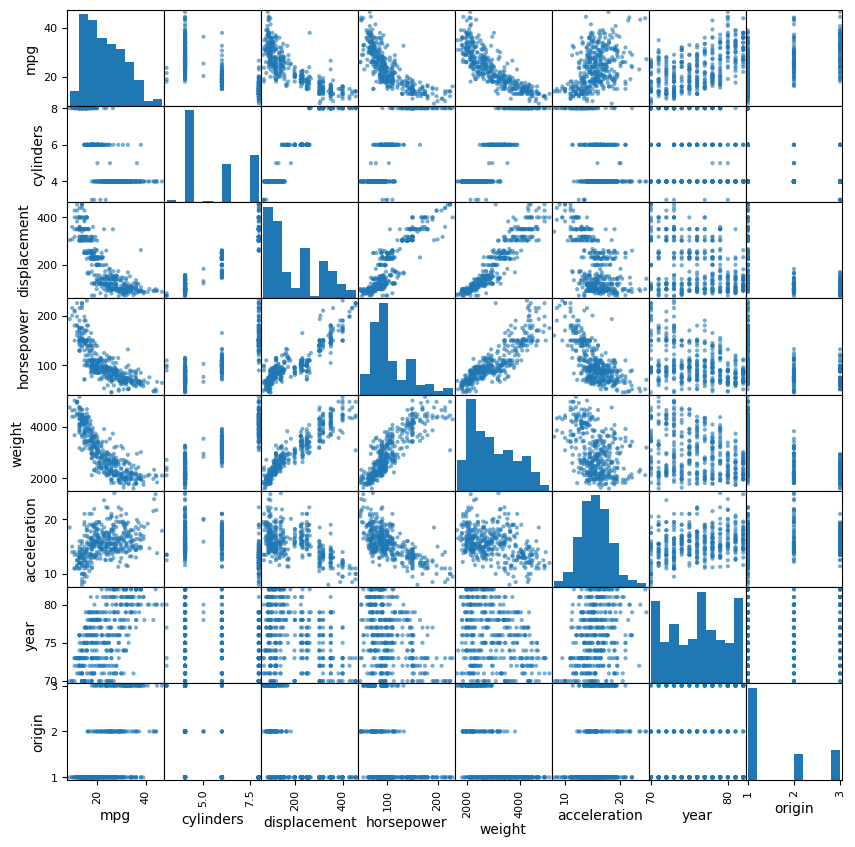

In [48]:
auto_data = load_data("Auto")
# a. scatter plot  matrix
fig = pd.plotting.scatter_matrix(auto_data, figsize= (10,10), alpha = 0.6)
# b . matrix of correlations
corr_matrix = pd.DataFrame.corr(auto_data)
print(corr_matrix)

In [50]:
# c. perform multiple linear regression with mpg as the response and all except name as predictors
y = auto_data['mpg']
x = auto_data.drop(columns = ['mpg'])
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
summarize(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          2.04e-139
Time:                        14:33:19   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

***i.*** Is there a relationship between the predictors and the re-
sponse? Use the anova_lm() function from statsmodels to
answer this question.

There is a relationship between predictors namely displacement, weight, year, and origin and the response (mpg). 

***ii.*** Which predictors appear to have a statistically significant
relationship to the response?

The 'year' predictor appears to have to most significant relationship indicating by coef = 0.75. 

***iii.*** What does the coefficient for the year variable suggest?

The positive coef value indicates that mpg increases 0.75 with additional one year. 

**(d)** Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

13

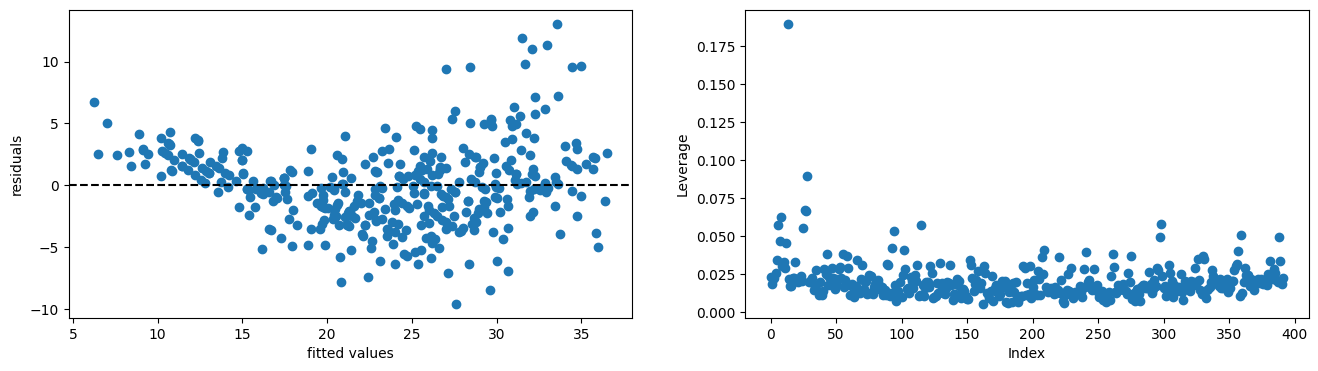

In [61]:
# (d). diagnostic plots
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,4))
ax1.scatter(model.fittedvalues, model.resid)
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
ax1.axhline(0, c='k', ls='--')

infl = model.get_influence()
ax2.scatter(np.arange(x.shape[0]), infl.hat_matrix_diag)
ax2.set_xlabel('Index')
ax2.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [69]:
# (e) Model with interaction terms
auto_data ['horsepower*displacement'] = auto_data['horsepower'] * auto_data['displacement']
y = auto_data['mpg']
x = sm.add_constant(auto_data[['horsepower','displacement','horsepower*displacement']])
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     381.0
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          3.00e-115
Time:                        15:43:35   Log-Likelihood:                -1092.1
No. Observations:                 392   AIC:                             2192.
Df Residuals:                     388   BIC:                             2208.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      53.0511      1.526     34.765      0.000      50.051      56.051
horsepower                 -0.2343      0.020    -11.960      0.000      -0.273      -0.196
displacement               -0.0980      0.007    -14.674      0.000      -0.111      -0.085
horsepower*displacement     0.0006   5.19e-05     11.222      0.000       0.000       0.001
==============================================================================
Omnibus:                       46.481   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.417
Skew:                           0.685   Prob(JB):                     1.04e-19
Kurtosis:                       4.865   Cond. No.                     2.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(f)** Try a few different transformations of the variables, such as
log(X), √X, X2. Comment on your findings.

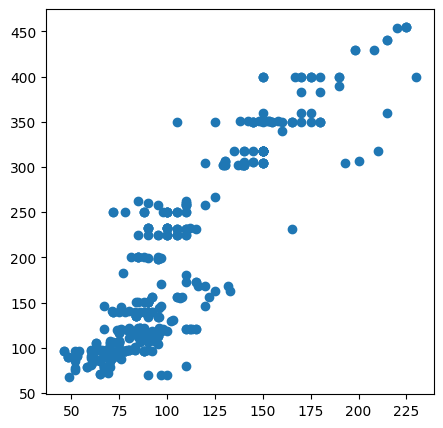

In [70]:
fig,ax = plt.subplots(figsize = (5,5))
ax.scatter(auto_data['horsepower'], auto_data['displacement'])


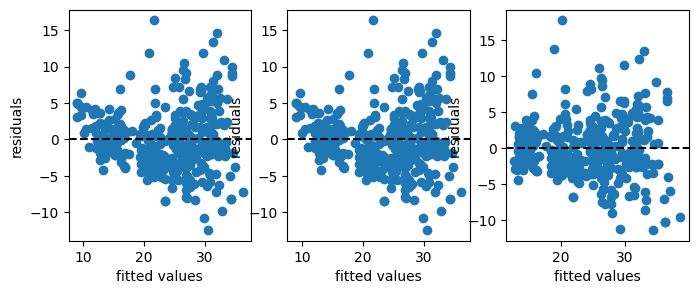

In [81]:
# using log()
auto_data['horsepower_log'] = np.log(auto_data['horsepower'])
auto_data['displacement_log'] = np.log(auto_data['displacement'])
auto_data['hd_interaction_log']=np.log(auto_data['horsepower*displacement'])
X = sm.add_constant(auto_data[['horsepower_log','displacement_log','hd_interaction_log']])
model_log = sm.OLS(auto_data['mpg'], X).fit()
model_log.summary()
# using x^2
auto_data['horsepower_sqrt'] = np.sqrt(auto_data['horsepower'])
auto_data['displacement_sqrt'] = np.sqrt(auto_data['displacement'])
auto_data['hd_interaction_sqrt']=np.sqrt(auto_data['horsepower*displacement'])
X_sqrt = sm.add_constant(auto_data[['horsepower_sqrt','displacement_sqrt','hd_interaction_sqrt']])
model_sqrt = sm.OLS(auto_data['mpg'], X_sqrt).fit()
model_sqrt.summary()


fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (8,3))
# plot the first model without transformation
ax1.scatter(model.fittedvalues, model.resid)
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
ax1.axhline(0, c='k', ls='--')
# plot the log transformed 
ax2.scatter(model_log.fittedvalues, model_log.resid)
ax2.set_xlabel('fitted values')
ax2.set_ylabel('residuals')
ax2.axhline(0, c='k', ls='--')
# plot the square of predictors
ax3.scatter(model_sqrt.fittedvalues, model_sqrt.resid)
ax3.set_xlabel('fitted values')
ax3.set_ylabel('residuals')
ax3.axhline(0, c='k', ls='--')